In [15]:
# Import libraries
import PortfolioLab as pl
import cufflinks as cf
import pandas as pd

# Set cufflinks offline
cf.go_offline()

In [16]:
def read_xlsl_MSCI(tickers, nomes, start='1990', end='2100'):
    MSCIs = pd.DataFrame()
        
    for ticker in tickers:
        # Read relevant information
        MSCI = pd.read_excel(ticker + '.xlsx').iloc[6:].dropna()
        # Rename columns
        MSCI.columns = ['Date', 'Price']
        # Convert the date column to datetime
        MSCI['Date'] = pd.to_datetime(MSCI['Date'])
        # Set date column as index
        MSCI.set_index('Date', inplace=True)
        # Merge
        MSCIs = pl.merge_time_series(MSCIs, MSCI, how='outer').dropna()
        # Start / End
        MSCIs = MSCIs[start:end]
        # Growth Index
        MSCIs = pl.compute_growth_index(MSCIs)
        
    MSCIs.columns = nomes
    
    return MSCIs

Como podem ver a função read_xlsl_MSCI é em tudo semelhante à read_csv_investing. Mas neste caso os ficheiros devem ser ficheiros excel. Por defeito tenho que os ficheiros são .xlsx por isso é essa a extensão que os ficheiros deverão ter. Têm nada mesma a start e end se quiserem colocar outras datas à vossa preferência. A função está aqui apenas para visualização. Já está programada e devem usar pl.read_xlsl_MSCI como está no código abaixo sendo desnecessário copiarem a função para vosso código. Os ficheiros encontram-se na pasta partilhada como de costume mas também podem ir buscra outros índices MSCI ao site deles. Lembrem-se contudo que devem sacar a versão "Gross" dos mesmos e que deverão ser denominados na mesma moeda para serem comparáveis.

In [17]:
MSCIs = pl.read_xlsl_MSCI(tickers=['MSCI_World_EUR', 'MSCI_EM_EUR'], 
                          nomes=['World €', 'EM €'])

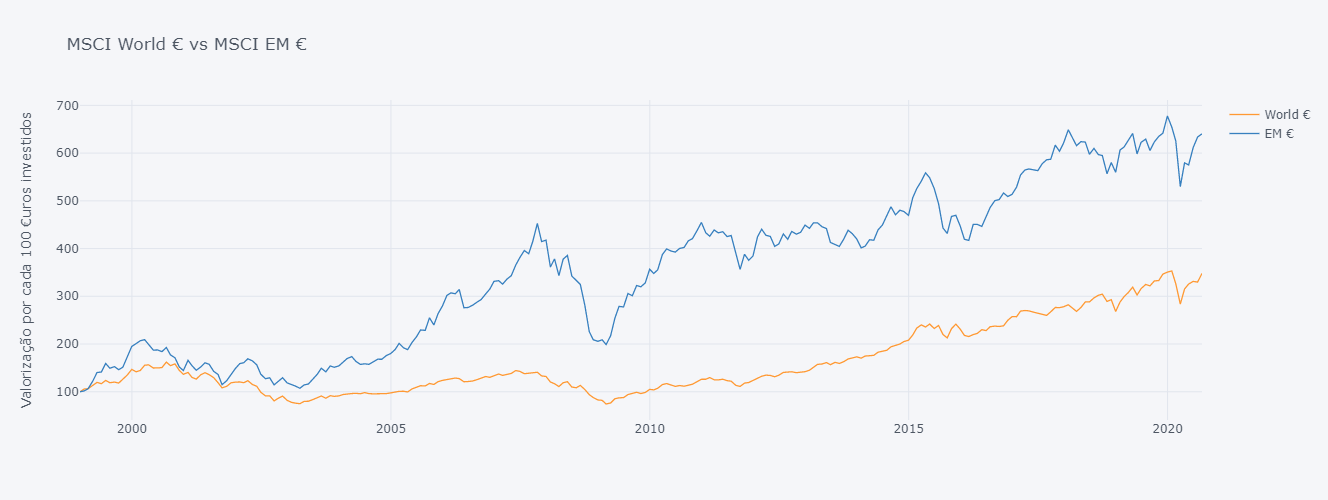

In [18]:
MSCIs.iplot(dimensions=pl.dimensions, title= 'MSCI World € vs MSCI EM €', yTitle='Valorização por cada 100 €uros investidos')

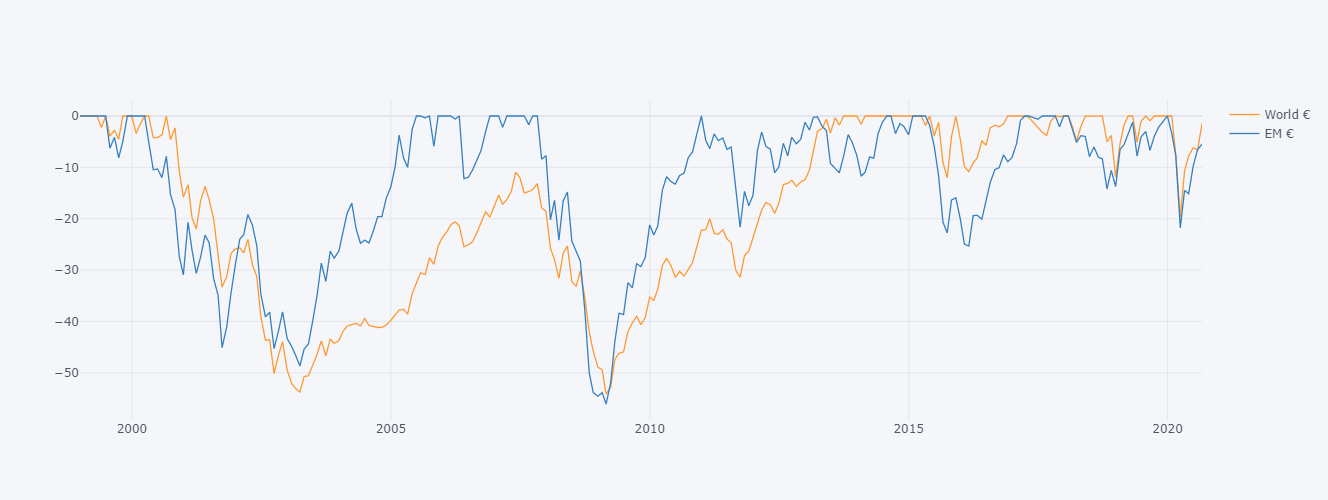

In [19]:
DD = pl.compute_drawdowns(MSCIs)
DD.iplot(dimensions=pl.dimensions)

In [20]:
# Compute Performance table
pl.compute_performance_table(MSCIs, freq='months')

**Performance from 1998-12-31 to 2020-08-31 (≈ 21.7 years)**

,CAGR,Return,StdDev,Sharpe,Max DD,MAR
World €,5.92%,247.97%,14.38%,0.41,-54.15%,0.11
EM €,8.94%,540.47%,19.92%,0.45,-56.08%,0.16


Colocar a opção freq='months' uma vez que a frequência dos dados é mensal e necessário estar correcta para o desvio padrão anualizado estar bem calculado. Quando são diários não é necessário colocar pois por defeito o sistema assume que são diários.